<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/Project_Phase_1_full_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Phase 1 - EDA/Wrangling***

## Set up

In [1]:
! git clone https://github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 159 (delta 29), reused 13 (delta 13), pack-reused 127 (from 1)
Receiving objects: 100% (159/159), 40.55 MiB | 9.70 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('/content/Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


In [4]:
# shape
print(df.shape,'\n')
print(df.dtypes, '\n')
print(df.columns,'\n')
df.dtypes

(2419144, 18) 

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
reordered_yes/no           object
order_day                  object
total_order_count           int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
department                 object
dtype: object 

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'reordered_yes/no', 'order_day',
       'total_order_count', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object') 



,0
order_id,int64
user_id,int64
eval_set,object
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64


## Products

In [5]:
# information on departments
print(df['department'].unique(),'\n')
print(df['department'].value_counts(),'\n')

['beverages' 'dairy eggs' 'international' 'snacks' 'produce'
 'personal care' 'household' 'pantry' 'breakfast' 'bakery' 'deli' 'frozen'
 'dry goods pasta' 'canned goods' 'babies' 'other' 'alcohol' 'missing'
 'meat seafood' 'bulk' 'pets'] 

department
produce            767537
dairy eggs         438764
snacks             210625
beverages          207337
pantry             136252
frozen             129310
bakery              89407
deli                72244
canned goods        62012
dry goods pasta     52389
breakfast           52096
household           44091
meat seafood        43102
babies              40427
personal care       28166
international       18917
alcohol             11561
pets                 5014
missing              3684
bulk                 3458
other                2751
Name: count, dtype: int64 



Text(0.5, 1.0, 'Distribution of department')

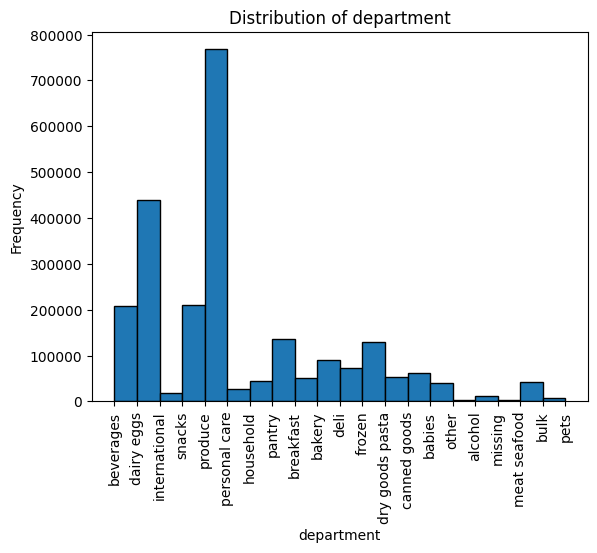

In [6]:
# departments histogram
plt.hist(df['department'], bins=20, edgecolor='black')
plt.xlabel('department')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of department')

In [7]:
# information on aisles
print(df['aisle'].unique(),'\n')
print(df['aisle'].value_counts(),'\n')

['coffee' 'refrigerated' 'milk' 'soy lactosefree'
 'water seltzer sparkling water' 'asian foods' 'chips pretzels'
 'energy granola bars' 'fresh fruits' 'fresh vegetables' 'fresh herbs'
 'soap' 'dish detergents' 'yogurt' 'spreads' 'popcorn jerky'
 'fruit vegetable snacks' 'soft drinks' 'cream' 'juice nectars' 'tea'
 'condiments' 'cereal' 'breakfast bars pastries' 'mint gum'
 'breakfast bakery' 'baking ingredients' 'cleaning products'
 'honeys syrups nectars' 'bread' 'granola' 'specialty cheeses' 'butter'
 'packaged vegetables fruits' 'other creams cheeses'
 'nuts seeds dried fruit' 'crackers' 'lunch meat' 'packaged produce'
 'paper goods' 'cookies cakes' 'energy sports drinks' 'cold flu allergy'
 'doughs gelatins bake mixes' 'hot cereal pancake mixes'
 'tofu meat alternatives' 'frozen vegan vegetarian' 'oils vinegars'
 'packaged cheese' 'instant foods' 'frozen produce' 'frozen meals'
 'pasta sauce' 'fresh dips tapenades' 'canned meals beans'
 'soup broth bouillon' 'dry pasta' 'marinades

Text(0.5, 1.0, 'Distribution of aisle')

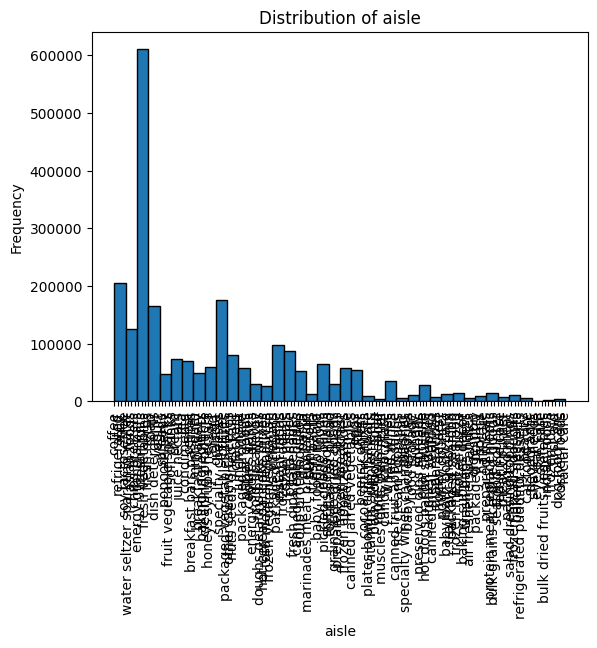

In [8]:
# aisles histogram
plt.hist(df['aisle'], bins=40, edgecolor='black')
plt.xlabel('aisle')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of aisle')

## Orders

In [25]:
print(df['total_order_count'].describe())
print(df['total_order_count'].value_counts())

count    2.419144e+06
mean     9.311593e+01
std      6.960298e+00
min      7.900000e+01
25%      8.700000e+01
50%      9.800000e+01
75%      9.900000e+01
max      9.900000e+01
Name: total_order_count, dtype: float64
total_order_count
99    1172312
84      82704
81      82418
80      80883
83      79320
85      75181
89      71565
87      69807
82      65976
88      65781
86      64145
95      59898
91      59398
92      55188
79      53052
94      52635
93      50440
90      48399
97      44969
98      44604
96      40469
Name: count, dtype: int64


In [9]:
df['reordered_yes/no']

,reordered_yes/no
0,no
1,no
2,no
3,no
4,no
...,...
2419139,yes
2419140,yes
2419141,yes
2419142,yes


In [10]:
df['order_day']

,order_day
0,tuesday
1,monday
2,monday
3,monday
4,monday
...,...
2419139,thursday
2419140,thursday
2419141,thursday
2419142,friday


In [11]:
print(df['order_day'].value_counts())
print(df['order_day'].describe())

order_day
sunday       429262
monday       351542
thursday     348066
tuesday      344907
saturday     342297
wednesday    340235
friday       262835
Name: count, dtype: int64
count     2419144
unique          7
top        sunday
freq       429262
Name: order_day, dtype: object


<Axes: xlabel='order_day', ylabel='Count'>

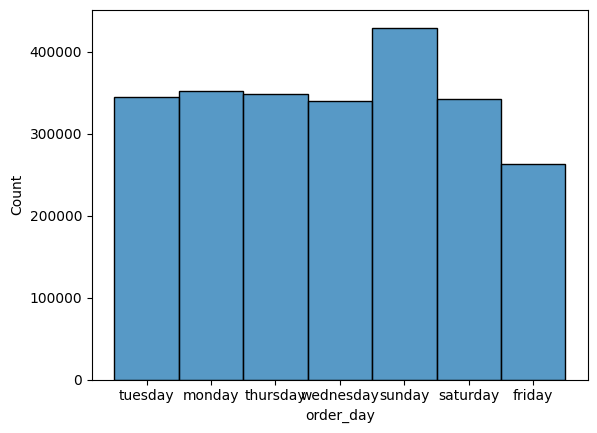

In [12]:
# histogram of order day of week
sns.histplot(data=df,x='order_day',bins=7)

<Axes: xlabel='order_dow', ylabel='Density'>

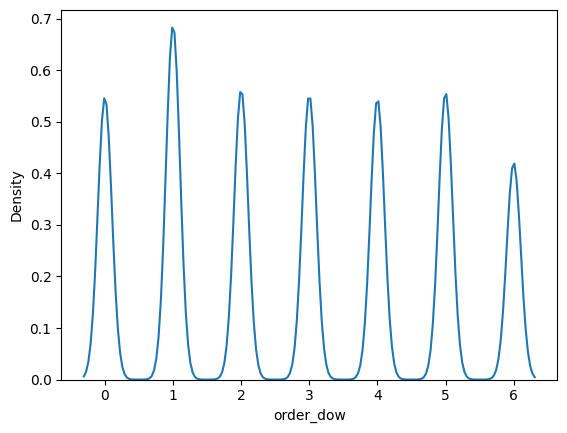

In [15]:
# kernel density plot of order day of week
sns.kdeplot(data=df,x='order_dow')

<Axes: xlabel='order_hour_of_day', ylabel='Count'>

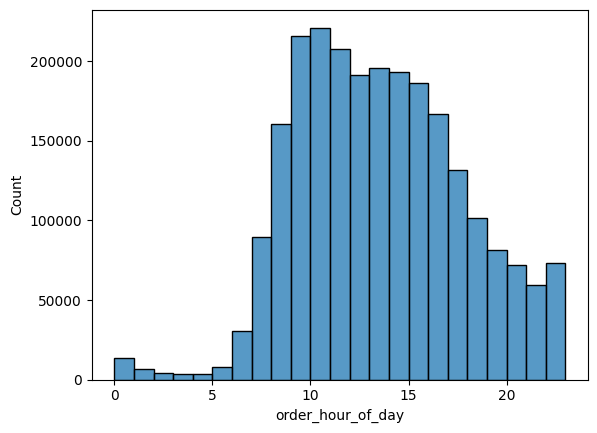

In [16]:
# histogram of hours of day
sns.histplot(data=df,x='order_hour_of_day',bins=23)

<Axes: xlabel='add_to_cart_order'>

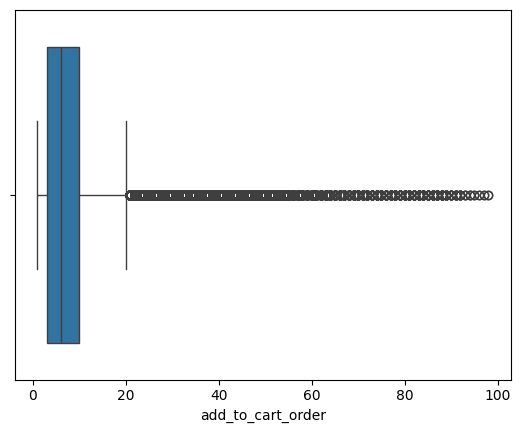

In [17]:
# box plot of add to cart order
sns.boxplot(data=df,x='add_to_cart_order')

In [19]:
# cross-tabulation of days of week and reorders
pd.crosstab(df['order_day'],df['reordered_yes/no'])

reordered_yes/no,no,yes
order_day,,
friday,64861,197974
monday,80203,271339
saturday,80557,261740
sunday,93421,335841
thursday,77808,270258
tuesday,79220,265687
wednesday,77382,262853
